# Logistic Regression

The logistic regression hypothesis is defined as:

$$h_\theta(x) = g(\theta^Tx)$$ where $g$ is the sigmoid function: $$g(z) = \frac{1}{1+e^{-z}}$$

The cost function for the logistic regression model which we now need to minimize:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i log(h_i(\theta)) - (1-y_i)log(1-h_i(\theta)))$$

We want to find $\theta$ so that $J(\theta)$ is minimized, or putting it differently its gradient is 0, where the gradient of the cost function with respect to $\theta$ is equal to:

$$\nabla_{\theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Note that while this gradient looks identical to linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

## Problem definition

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
students_exams = pd.read_csv('ex2data1.txt', 
                            header=None,
                            names=['FirstExamScore', 'SecondExamScore', 'Results'])
students_exams['Admission'] = np.where(students_exams['Results']==0, 'Not Admitted', 'Admitted')

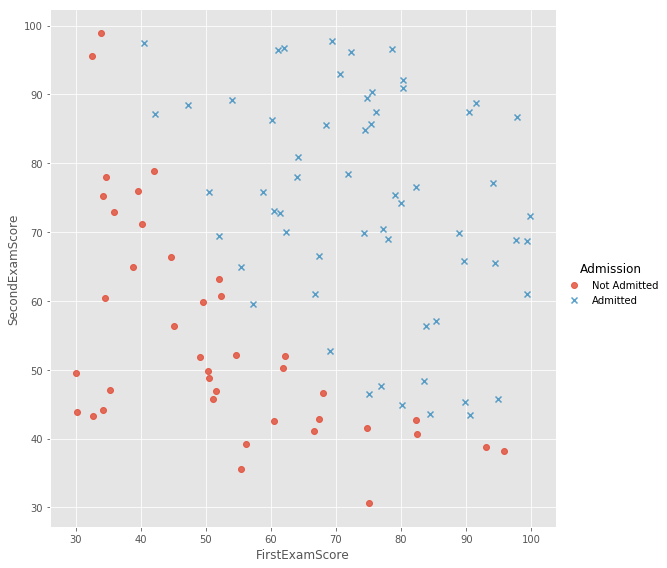

In [5]:
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, height=8)

In [6]:
X = students_exams.iloc[:, 0:2]
X = np.c_[np.ones(X.shape[0]), X]
y = students_exams.iloc[:, 2:3]

In [36]:
X.shape, y.shape

((100, 3), (100, 1))

In [105]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunction(theta, X, y):
    m = y.shape[0]
    h = sigmoid(np.matmul(theta.T, X.T))
    cost = (1/m)*(np.matmul(-y.T,np.log(h).T) - np.matmul((1-y).T,np.log(1-h).T))
    if np.isnan(cost):
        return np.inf
    return cost

def computeGradient(theta, X, y):
    theta = theta.reshape(-1, 1)
    m = y.shape[0]
    h = sigmoid(np.matmul(theta.T, X.T))
    gradient = (1/m)*(np.matmul((h.T-y).T, X))
    return gradient.flatten()

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        hypothesis_minus_y = (sigmoid(np.matmul(theta.T, X.T).T)-y).T 
        theta = (theta.T - (alpha/m)*(np.matmul(hypothesis_minus_y, X))).T 
        J_history[i] = costFunction(theta, X, y)
    return theta, J_history

def plotDecisionBoundary(X, theta):
    plotx = np.array([min(X[:,1])-2, max(X[:,1])+2])
    ploty = -(theta[1] * plotx + theta[0])/theta[2]
    return plotx, ploty

def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    p = np.where(prob < 0.5, 0, 1)
    return p.reshape(-1, 1)

### Running the model with Gradient Decent

In [123]:
theta = np.zeros((3, 1))
iterations =400
alpha = 0.001
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: intercept={0}, slope={1}, slope={2} ".format(theta[0],theta[1], theta[2]))

Theta found by gradient descent: intercept=[-0.02781529], slope=[0.01061826], slope=[0.00066763] 


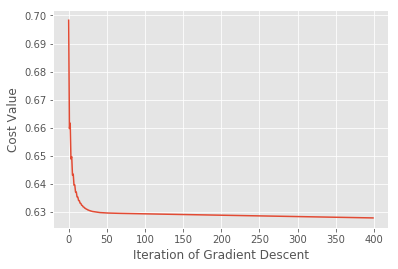

In [124]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history)
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

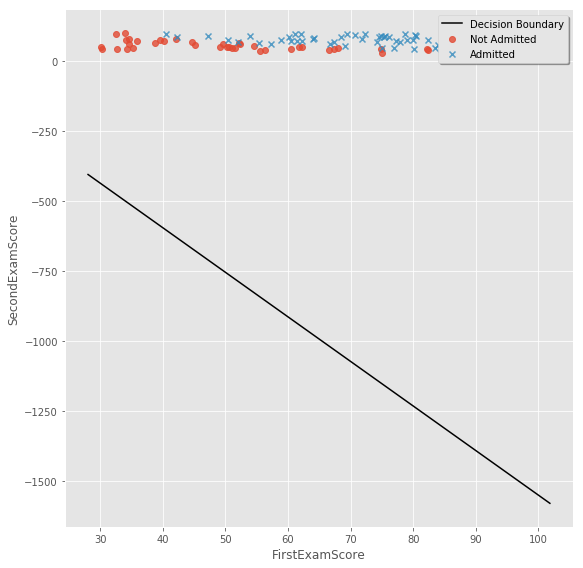

In [125]:
plotx, ploty= plotDecisionBoundary(X, theta)
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, height=8, legend=False)
ax = g.ax
ax.plot(plotx, ploty, color='k', label='Decision Boundary')
legend = ax.legend(loc=1, shadow=True)
plt.show()

It can be seeen that Gradient Decent is not doing a good job.

### Running the model with  BFGS algorithm

In [127]:
from scipy import optimize
theta = optimize.fmin_bfgs(f=costFunction, x0=initial_theta, args=(X, y), fprime=computeGradient)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 34
         Gradient evaluations: 30


/home/pptr/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/pptr/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


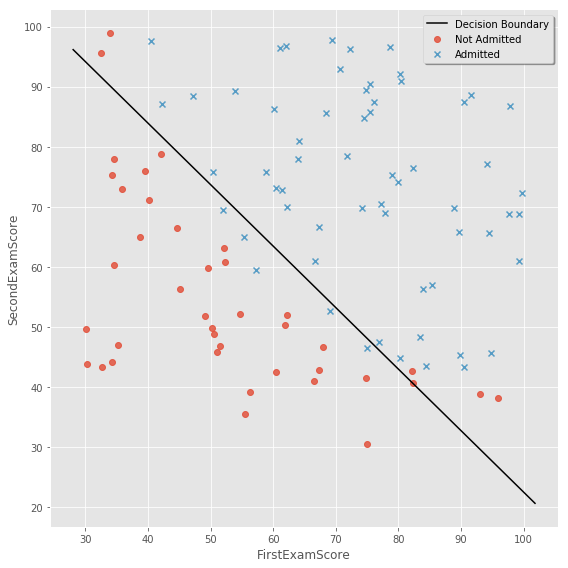

In [128]:
plotx, ploty= plotDecisionBoundary(X, theta)
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, height=8, legend=False)
ax = g.ax
ax.plot(plotx, ploty, color='k', label='Decision Boundary')
legend = ax.legend(loc=1, shadow=True)
plt.show()

###  Calculate Model Accuracy

In [134]:
prob = predict(X, theta)
p = np.where(prob == y, 1, 0)
print("Model accuracy: ", p.sum()/y.shape[0] * 100, "%")

Model accuracy:  89.0 %
